## Observations and Insights 

In [1]:
%matplotlib notebook
# Dependencies and Setup
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()


# Combine the data into a single dataset
mouse_study = mouse_metadata.merge(study_results, how='inner', on='Mouse ID')


# Display the data table for preview
mouse_study = mouse_study[["Mouse ID","Timepoint","Tumor Volume (mm3)", "Metastatic Sites",
                           "Drug Regimen","Sex","Age_months","Weight (g)" ]]

mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
len(mouse_study["Mouse ID"].unique())

249

In [109]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study[mouse_study.duplicated()]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
909,g989,0,45.0,0,Propriva,Female,21,26


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
dups = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
dups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study = mouse_study.loc[mouse_study["Mouse ID"] != "g989"]
mouse_study.set_index(["Mouse ID","Timepoint"])
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [5]:
# Checking the number of mice in the clean DataFrame. 
len(mouse_study["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_reg_grouped = mouse_study.groupby("Drug Regimen")
drug_reg_grouped.count()

mean_tumor_vol = drug_reg_grouped["Tumor Volume (mm3)"].mean()
mean_tumor_vol

median_tumor_vol = drug_reg_grouped["Tumor Volume (mm3)"].median()
median_tumor_vol

median_tumor_variance = drug_reg_grouped["Tumor Volume (mm3)"].var()
median_tumor_variance

median_tumor_std = drug_reg_grouped["Tumor Volume (mm3)"].std()
median_tumor_std

median_tumor_sem = drug_reg_grouped["Tumor Volume (mm3)"].sem()
median_tumor_sem

# Create a dataframe to hold the above results
drug_regimen_summary = pd.DataFrame({
                                  "Mean Tumor Volume":mean_tumor_vol,
                                  "Median Tumor Volume":median_tumor_vol,
                                  "Tumor Volume Variance":median_tumor_variance,
                                  "Tumor Volume Std. Dev":median_tumor_std,
                                  "Tumor Volume Std. Err":median_tumor_sem
                                })

drug_regimen_summary.index.name = "Drug Regimen"
drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Using the aggregation method, produce the same summary statistics in a single line

In [7]:
new_drug_regimen_summary_chart = mouse_study.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
new_drug_regimen_summary_chart

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


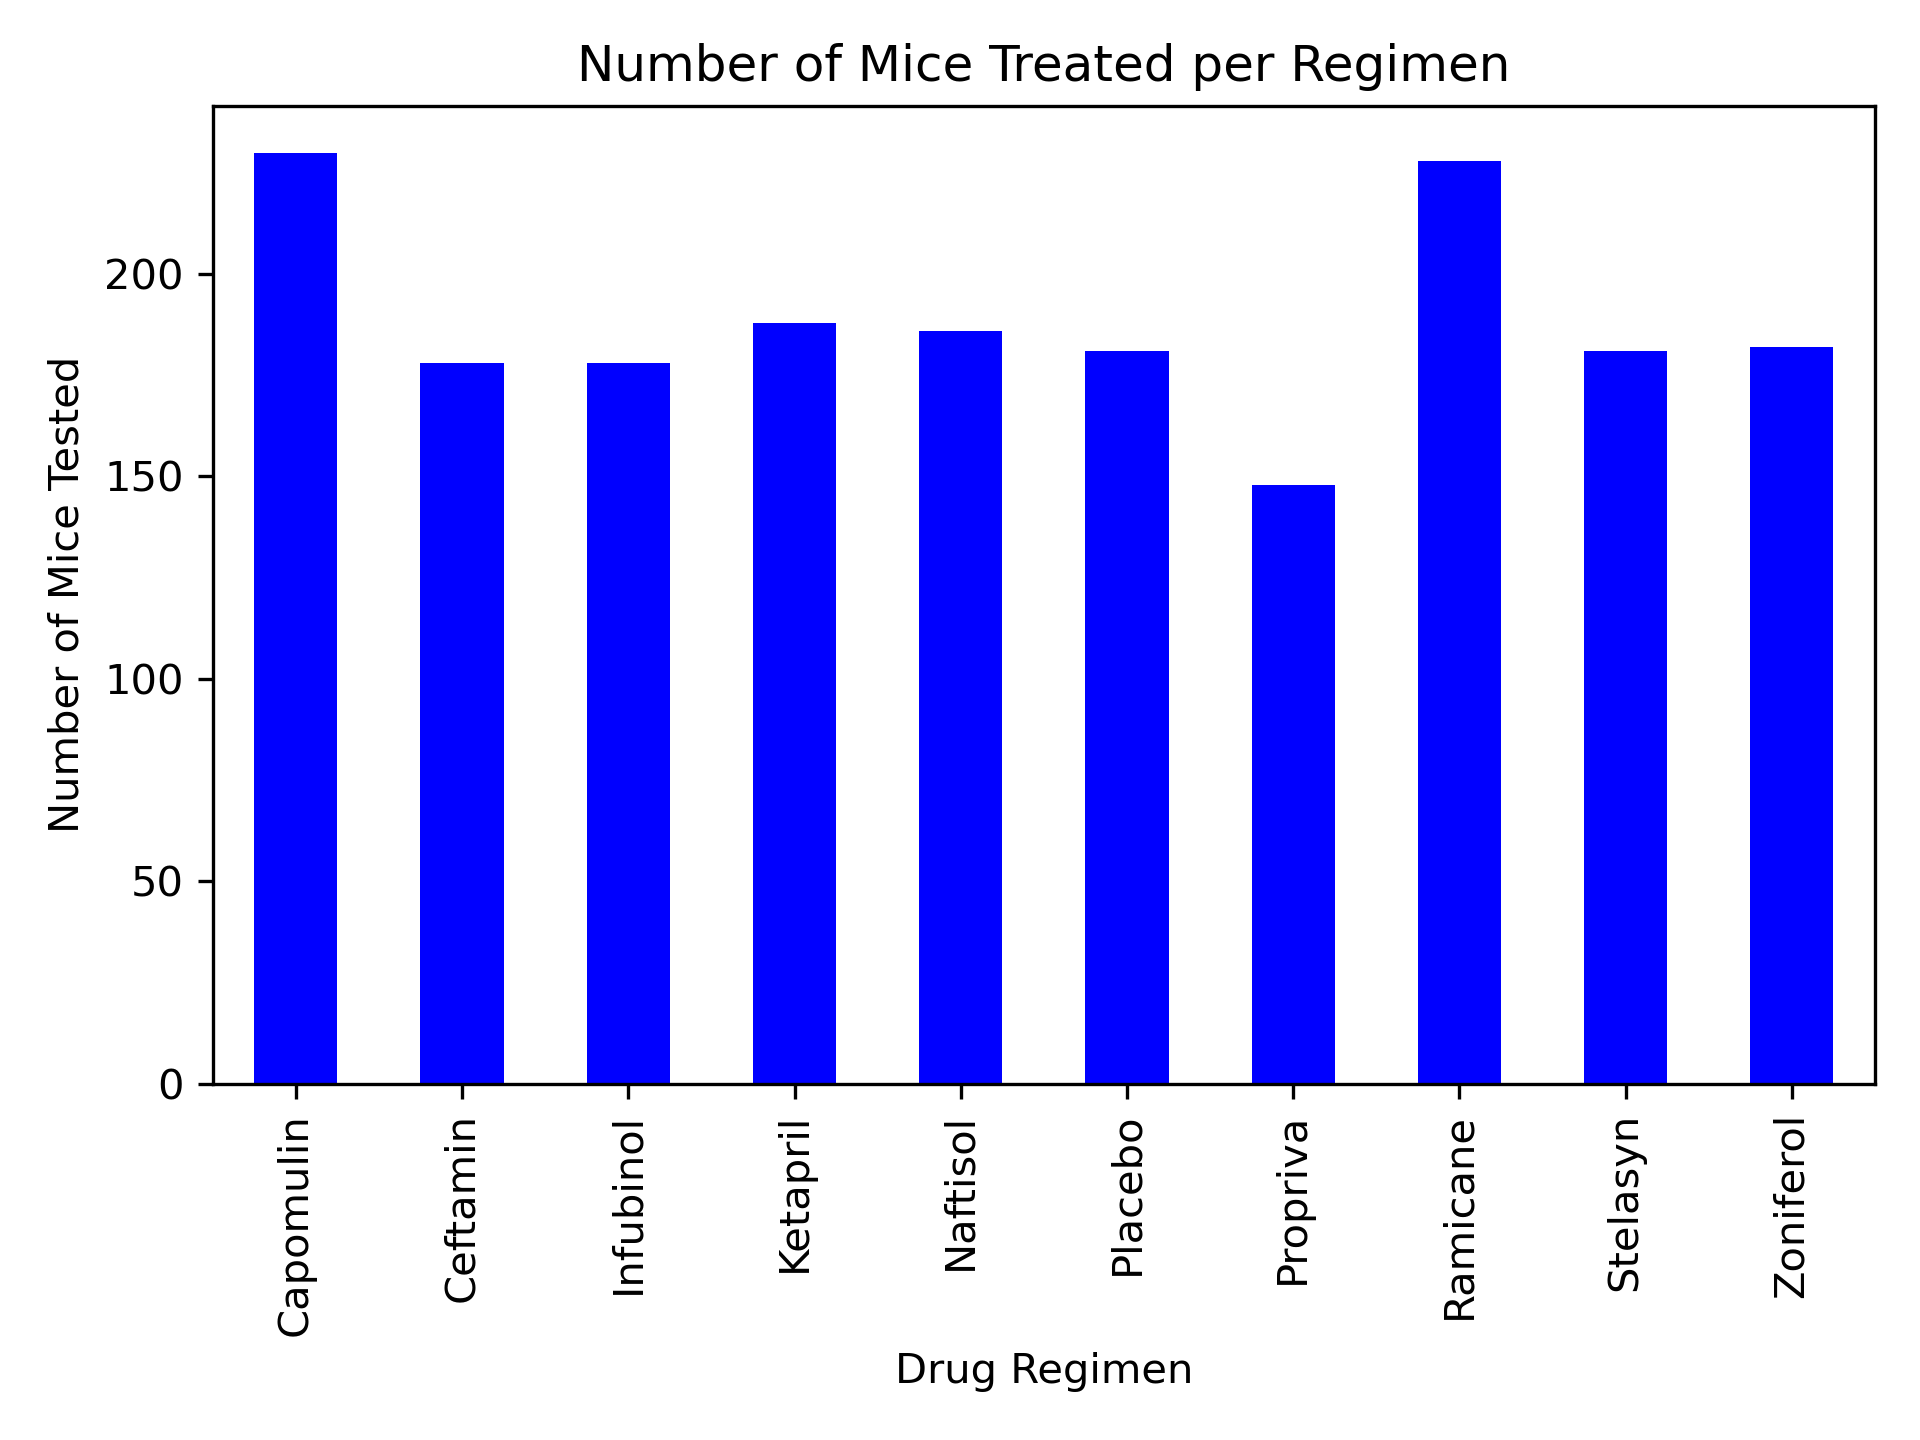

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_regimen = mouse_study.groupby("Drug Regimen").count()["Mouse ID"]
mice_per_regimen
plot_pandas = mice_per_regimen.plot(kind="bar", color="b")

# Set textual properties
plt.title("Number of Mice Treated per Regimen")
plt.ylabel("Number of Mice Tested")

# Show the bar chart
plt.show()
# Resize plot to display labels
plt.tight_layout()


<IPython.core.display.Javascript object>


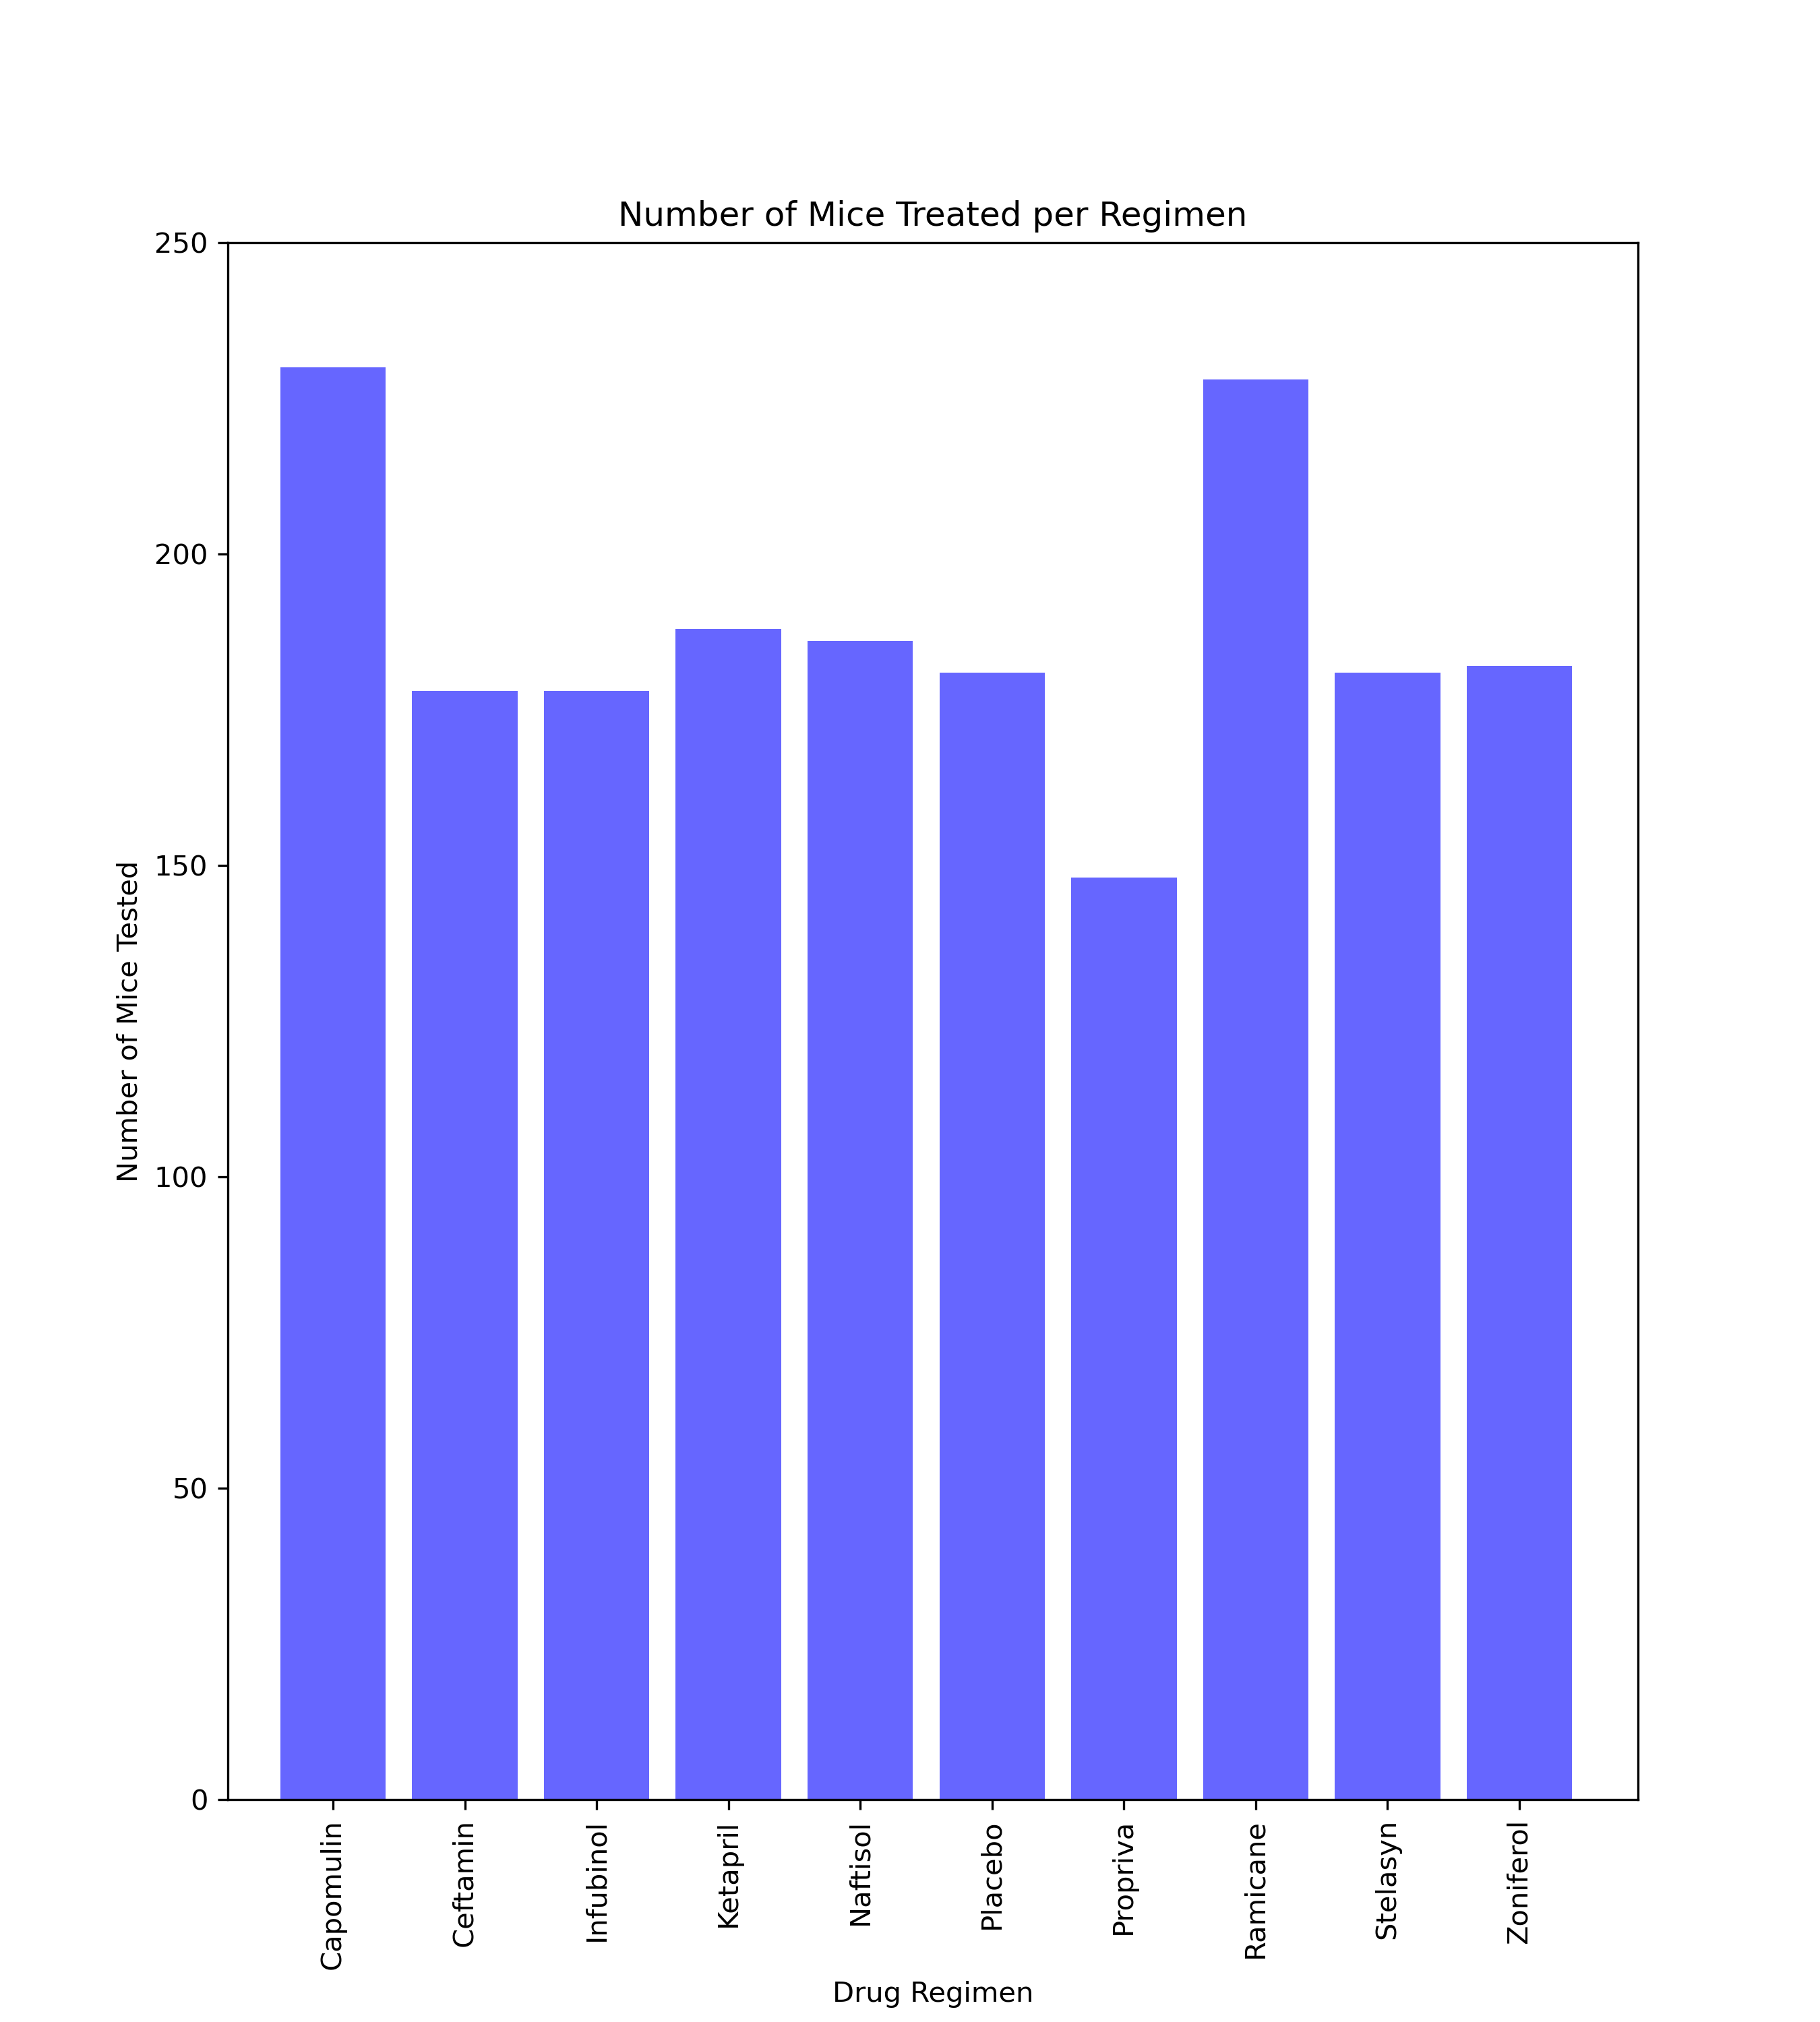

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(mice_per_regimen))

regimen_in_study = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 
                    'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

mice_in_study =(mouse_study.groupby(["Drug Regimen"])["Mouse ID"].count())

fig = plt.figure(figsize = (9, 10))
plt.bar(x_axis, mice_in_study, color='b', alpha=0.6, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_in_study,rotation='vertical',fontsize = 10)

plt.xlim(-0.8, len(x_axis)-0.10)

plt.ylim(0, max(mice_in_study)+20)

plt.title("Number of Mice Treated per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()


In [226]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#male_number_mice = mouse_metadata.loc[mouse_metadata["Sex"] == "Male"].count()
#male_number_mice 

#female_number_mice = mouse_metadata.loc[(mouse_metadata["Sex"] == "Female") & 
#                                        (mouse_metadata["Mouse ID"] != "g989")].count()
#female_number_mice 

#total_mice = male_number_mice + female_number_mice
#print(f'Total mice are {total_mice} with {male_number_mice} male and {female_number_mice} females')



<IPython.core.display.Javascript object>


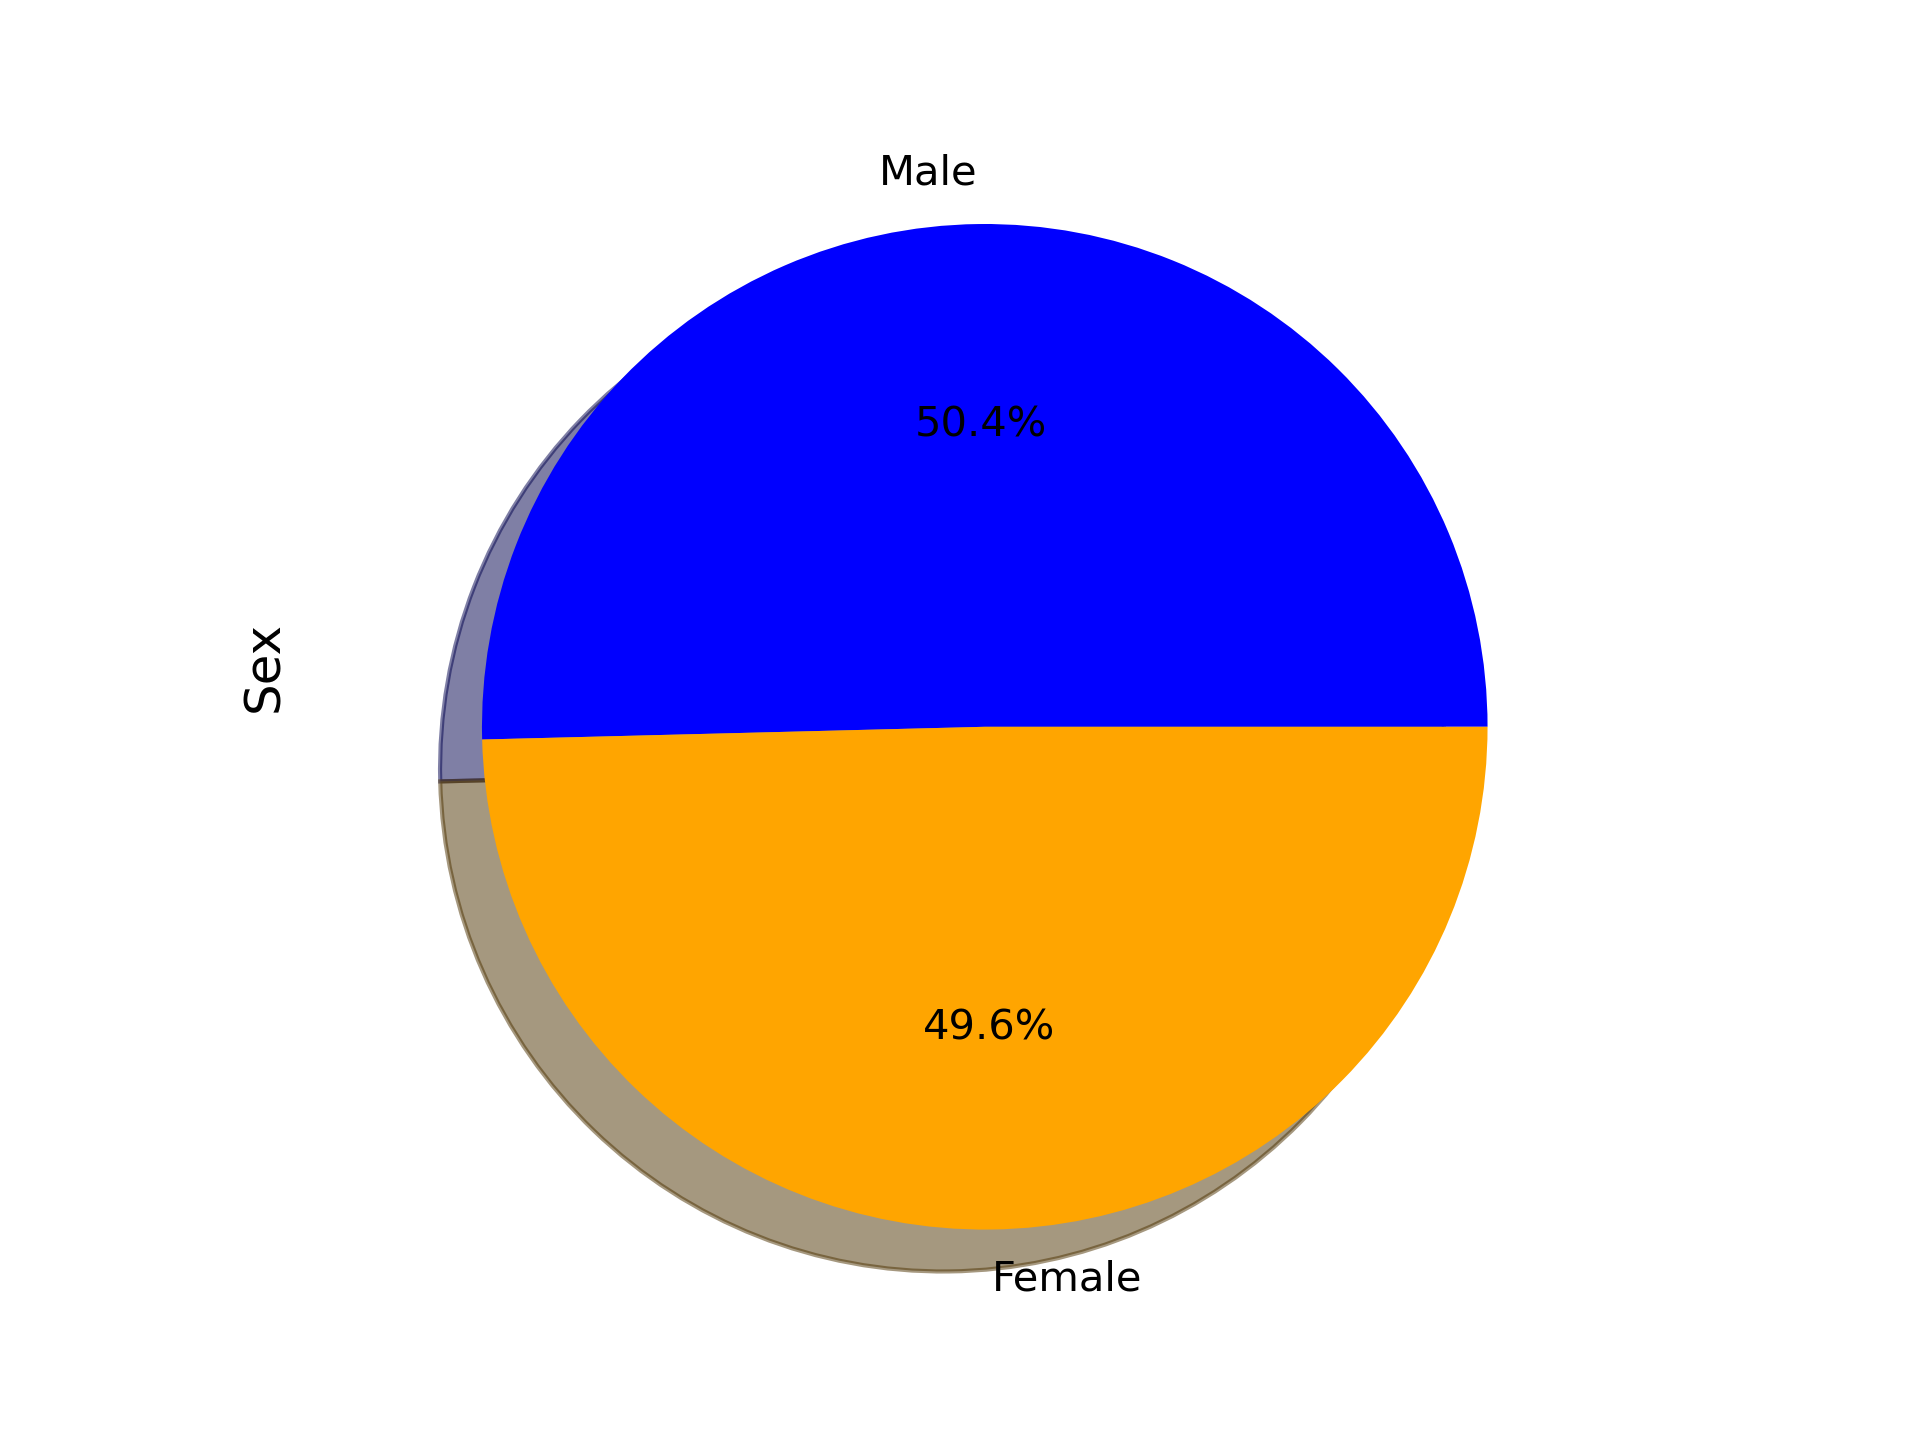

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_number_mice = mouse_metadata.loc[mouse_metadata["Sex"] == "Male"].count()
# The output is 125 male mice
male = male_number_mice[0] 
 

female_number_mice = mouse_metadata.loc[(mouse_metadata["Sex"] == "Female") & 
                                        (mouse_metadata["Mouse ID"] != "g989")].count()
# The output shows 123 female mice
female = female_number_mice[0]

# Expected percentages for male mice are 125/248*100
# Expected percentages for female mice is 123/248*100

# Labels for the sections of our pie chart
genders = ["Male","Female"]

# The values of each section of the pie chart
gender_numbers = [male,female]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to not to seperate the "Males" section from the "Females" section
explode = (0, 0)

plt.pie(gender_numbers, explode=explode, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("Sex", rotation = -270, loc = 'left', y=0.5)
plt.axis("equal")
plt.show()
 

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
